# **Ex. 1 - First steps with scikit-learn**

Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower samples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Splitting data into 70% training and 30% test data:

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [3]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


Standardizing the features:

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# **Ex. 2 - Modeling class probabilities via logistic regression**

### *Part 1 - Train a logistic regression model* (check https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with scikit-learn: use C=100.0 and random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend). Evaluate the results on the test set. 

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

clf = LogisticRegression(random_state=1,C = 100)
clf.fit(X_train_std, y_train)

predicted = clf.predict(X_test_std)

result = clf.score(X_test_std, y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 97.778%


In [7]:
confusion_matrix(y_test, predicted)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

Conclusao sobre a matriz de confusao

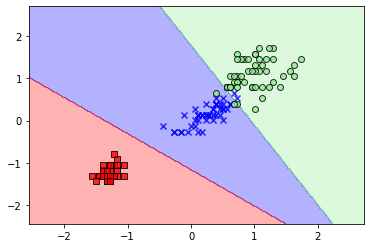

In [8]:
plot_decision_regions(X_combined_std, y_combined, clf)

### *Part 2 - Tackling overfitting via regularization*: evaluate different values for C (up to 100) and observe the accuracy difference between training and test sets. Plot the results.

In [9]:
C = 0.001
resultTrainList = []
resultTestList = []
CValues = []

for x in range(5):
  clf = LogisticRegression(random_state=1,C = C)
  C = C*10
  clf.fit(X_train_std, y_train)

  predicted = clf.predict(X_test_std)

  scoreTrain = clf.score(X_train_std, y_train)
  scoreTest = clf.score(X_test_std, y_test)

  print("C Value Train = " + str(C) + " - Accuracy = " + str(scoreTrain))
  print("C Value Test = " + str(C) + " - Accuracy = " + str(scoreTest))

  CValues.append(C)
  resultTrainList.append(scoreTrain)
  resultTestList.append(scoreTest)

C Value Train = 0.01 - Accuracy = 0.7047619047619048
C Value Test = 0.01 - Accuracy = 0.6666666666666666
C Value Train = 0.1 - Accuracy = 0.8380952380952381
C Value Test = 0.1 - Accuracy = 0.7777777777777778
C Value Train = 1.0 - Accuracy = 0.9523809523809523
C Value Test = 1.0 - Accuracy = 1.0
C Value Train = 10.0 - Accuracy = 0.9428571428571428
C Value Test = 10.0 - Accuracy = 0.9777777777777777
C Value Train = 100.0 - Accuracy = 0.9523809523809523
C Value Test = 100.0 - Accuracy = 0.9777777777777777


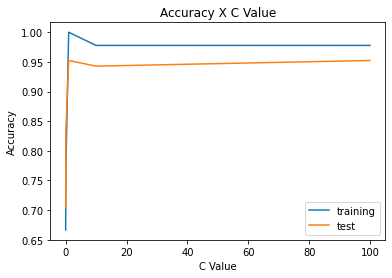

In [ ]:
fig, ax = plt.subplots()
ax.plot(CValues, resultTestList, label='training')
ax.plot(CValues, resultTrainList, label='test')

ax.set_xlabel('C Value') 
ax.set_ylabel('Accuracy')
ax.set_title("Accuracy X C Value") 
ax.legend() 

As we can see when C value is almost 0 we experienced underfitting because the model is generalizing the test values too much. For values from 10 to 100 the accuracy keeps the same 97%. 

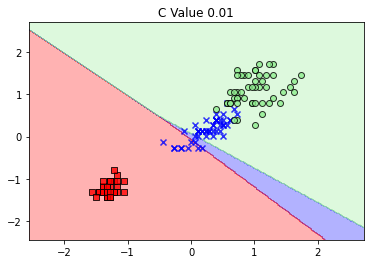

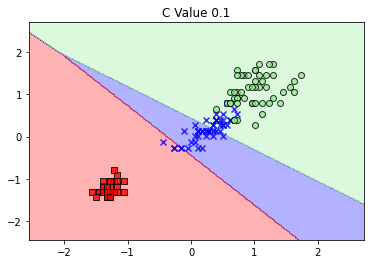

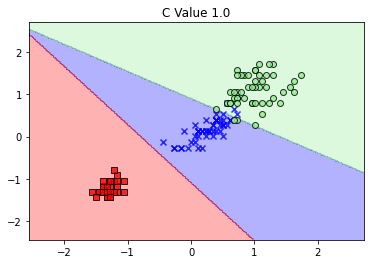

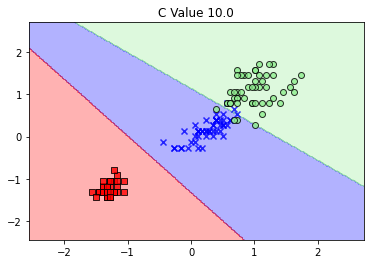

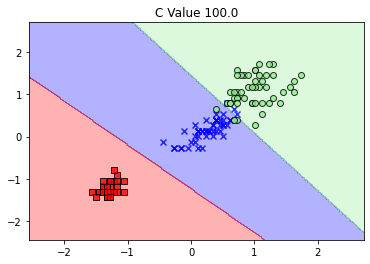

In [10]:
C = 0.001

for x in range(5):
  clf = LogisticRegression(random_state=1, C = C)
  C = C*10
  clf.fit(X_train_std, y_train)
  clf.predict(X_test_std)

  fig, ax = plt.subplots()
  ax.set_title("C Value " + str(C))
  plot_decision_regions(X_combined_std, y_combined, clf)

As we can see above for C values less than 1 the accuracy is about 66% which means  underfittinge, the model it generalizing too much. When I changed the C value to 1, 10, 100 the accuracy didn't change (97%).

# **Ex. 3 - Maximum margin classification with support vector machines**

### *Part 1 - Dealing with the nonlinearly separable case using slack variables* (check linear kernel at https://scikit-learn.org/stable/modules/svm.html): use C=1.0 and random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend and included above). Evaluate the results on the test set. 

In [ ]:
from sklearn import svm

clf = svm.LinearSVC(random_state=1, C=1.0)
clf.fit(X_train_std, y_train)

predicted = clf.predict(X_test_std)

result = clf.score(X_test_std, y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 95.556%


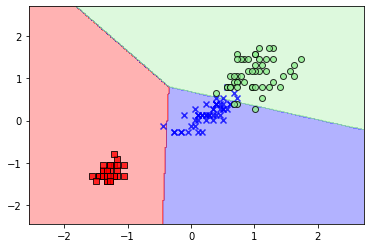

In [ ]:
plot_decision_regions(X_combined_std, y_combined, clf)

### *Part 2 - Using the kernel trick to find separating hyperplanes in higher dimensional space*: use kernel='rbf', C=1.0, gamma=0.2, and random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend and included above). Evaluate the results on the test set. Compare and discuss the results with the previous case. Try different values for the kernel parameter and evaluate the results.

In [ ]:
clf = svm.SVC(kernel='poly', C=1, gamma='scale', random_state=1)
clf.fit(X_train_std, y_train)

clf.predict(X_test_std)

## Acuracia
clf.score(X_test_std, y_test)

0.9555555555555556

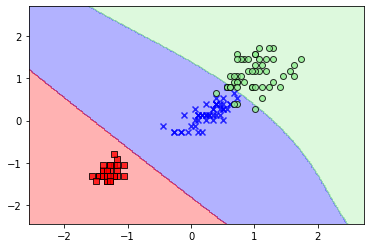

In [ ]:
plot_decision_regions(X_combined_std, y_combined, clf)

In [ ]:
clf = svm.SVC(kernel='sigmoid', C=1, gamma=0.2, random_state=1)
clf.fit(X_train_std, y_train)

clf.predict(X_test_std)

## Acuracia
clf.score(X_test_std, y_test)

0.9777777777777777

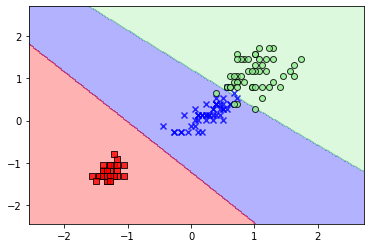

In [ ]:
plot_decision_regions(X_combined_std, y_combined, clf)

In [ ]:
clf = svm.SVC(kernel='rbf', C=1, gamma=0.2, random_state=1)
clf.fit(X_train_std, y_train)

clf.predict(X_test_std)

## Acuracia
clf.score(X_test_std, y_test)

0.9777777777777777

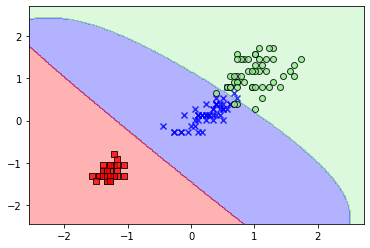

In [ ]:
plot_decision_regions(X_combined_std, y_combined, clf)

In [ ]:
clf = svm.SVC(kernel='rbf', C=1, gamma=0.9, random_state=1)
clf.fit(X_train_std, y_train)

clf.predict(X_test_std)

## Acuracia
clf.score(X_test_std, y_test)

0.9777777777777777

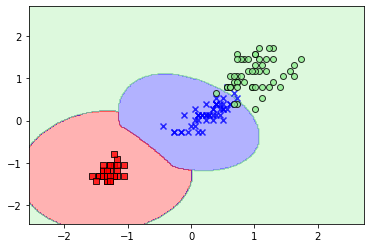

In [ ]:
plot_decision_regions(X_combined_std, y_combined, clf)

As we can see above the accuracy kept the same 97% when the kernel is changed to rbf and sigmoid. When kernel is changed to poly the accuracy also changed to 95%. When gamma is changed from 0.2 to 0.9 it also changed the decision regions but it didnt change the accuracy.

# **Ex. 4 - Decision tree learning**

### *Part 1 - Building a decision tree* (check https://scikit-learn.org/stable/modules/tree.html): use criterion='entropy', max_depth=4, random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend). Evaluate the results on the test set. Try different values for the max_depth and check the result.

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

clf = clf.fit(X_train_std, y_train)

clf.predict(X_test_std)

## Acuracia
clf.score(X_test_std, y_test)

0.9333333333333333

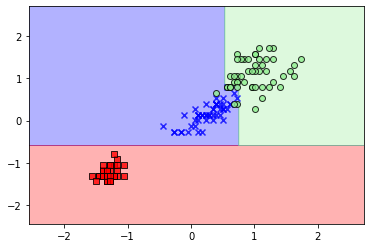

In [ ]:
plot_decision_regions(X_combined_std, y_combined, clf)

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1).fit(X_train_std, y_train)

clf.predict(X_test_std)

## Acuracia
clf.score(X_test_std, y_test)

0.9777777777777777

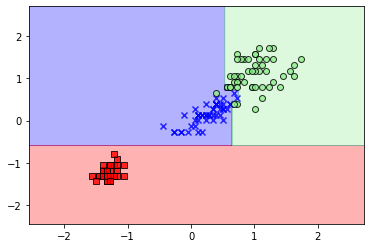

In [ ]:
plot_decision_regions(X_combined_std, y_combined, clf)

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=50, random_state=1).fit(X_train_std, y_train)

clf.predict(X_test_std)

## Acuracia
clf.score(X_test_std, y_test)

0.9777777777777777

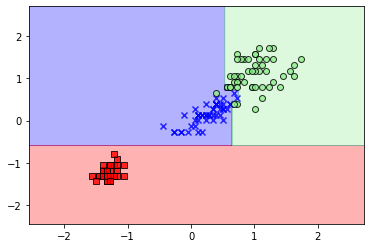

In [ ]:
plot_decision_regions(X_combined_std, y_combined, clf)

As we can see above for max_depth value equals 4 the accuracy was 93% but when I changed to values more than 10 it kept the same accuracy and same decision regions. 

### *Part 2 - Combining weak to strong learners via random forests* (check https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html): use criterion='entropy', n_estimators=25, max_depth=4, random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend). Evaluate the results on the test set. Compare with the single tree case. Try different values for the number of trees and check the result.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion='entropy', n_estimators=5, max_depth=4, random_state=1).fit(X_train_std, y_train)

clf.predict(X_test_std)

## Acuracia
clf.score(X_test_std, y_test)

0.9777777777777777

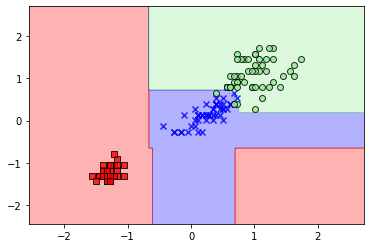

In [ ]:
plot_decision_regions(X_combined_std, y_combined, clf)

In [ ]:
clf = RandomForestClassifier(criterion='entropy', n_estimators=10, max_depth=4, random_state=1).fit(X_train_std, y_train)

clf.predict(X_test_std)

## Acuracia
clf.score(X_test_std, y_test)

0.9777777777777777

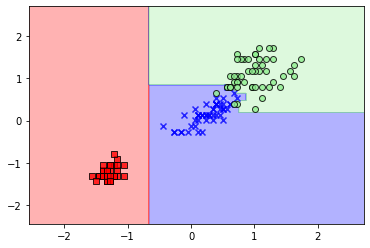

In [ ]:
plot_decision_regions(X_combined_std, y_combined, clf)

As we can see above the main difference between trees and random forest was in the decision regions. The accuracy kept the same 97% but the decision region got changed.